# <center>MICAS901 - Introduction to Optimization </center>#
# <center> Homework 2 </center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## IMPORTING DATA 

In [3]:
#load the data
communites_and_crime=pd.read_csv("DATA/communites_and_crime.csv", header = None)#data lecture without name column
household_power_consumption=pd.read_csv("DATA/Household_power_consumption.csv")

In [4]:
#to see the size of the datas
print("Communites and Crime Dataset        = ",communites_and_crime.shape)
print("Hosehold Power Consumption size     = ",household_power_consumption.shape)

Communites and Crime Dataset        =  (1994, 128)
Hosehold Power Consumption size     =  (2075259, 9)


# PREPROCESSING

In [5]:
#see the type of each training data
for i in range(communites_and_crime.shape[1]):
    print("communites_and_crime[", communites_and_crime.columns[i],"] == ",communites_and_crime.dtypes[i])
    print("#----------------------------------------------------------------------------------------------#")

communites_and_crime[ 0 ] ==  int64
#----------------------------------------------------------------------------------------------#
communites_and_crime[ 1 ] ==  object
#----------------------------------------------------------------------------------------------#
communites_and_crime[ 2 ] ==  object
#----------------------------------------------------------------------------------------------#
communites_and_crime[ 3 ] ==  object
#----------------------------------------------------------------------------------------------#
communites_and_crime[ 4 ] ==  int64
#----------------------------------------------------------------------------------------------#
communites_and_crime[ 5 ] ==  float64
#----------------------------------------------------------------------------------------------#
communites_and_crime[ 6 ] ==  float64
#----------------------------------------------------------------------------------------------#
communites_and_crime[ 7 ] ==  float64
#-----------------------

In [6]:
#see the type of each training data
for i in range(household_power_consumption.shape[1]):
    print("household_power_consumption[", household_power_consumption.columns[i],"] == ",household_power_consumption.dtypes[i])
    print("#----------------------------------------------------------------------------------------------#")

household_power_consumption[ datetime ] ==  object
#----------------------------------------------------------------------------------------------#
household_power_consumption[ Global_active_power ] ==  float64
#----------------------------------------------------------------------------------------------#
household_power_consumption[ Global_reactive_power ] ==  float64
#----------------------------------------------------------------------------------------------#
household_power_consumption[ Voltage ] ==  float64
#----------------------------------------------------------------------------------------------#
household_power_consumption[ Global_intensity ] ==  float64
#----------------------------------------------------------------------------------------------#
household_power_consumption[ Sub_metering_1 ] ==  float64
#----------------------------------------------------------------------------------------------#
household_power_consumption[ Sub_metering_2 ] ==  float64
#-----------

In [7]:
#to see the statistique of the testing data
print(communites_and_crime.describe(include="all"))

                0     1     2               3            4            5    \
count   1994.000000  1994  1994            1994  1994.000000  1994.000000   
unique          NaN   109   800            1828          NaN          NaN   
top             NaN     ?     ?  Greenvillecity          NaN          NaN   
freq            NaN  1174  1177               5          NaN          NaN   
mean      28.683551   NaN   NaN             NaN     5.493982     0.057593   
std       16.397553   NaN   NaN             NaN     2.873694     0.126906   
min        1.000000   NaN   NaN             NaN     1.000000     0.000000   
25%       12.000000   NaN   NaN             NaN     3.000000     0.010000   
50%       34.000000   NaN   NaN             NaN     5.000000     0.020000   
75%       42.000000   NaN   NaN             NaN     8.000000     0.050000   
max       56.000000   NaN   NaN             NaN    10.000000     1.000000   

                6            7            8            9    ...          11

In [8]:
#to see the statistique of the testing data
print(household_power_consumption.describe(include="all"))

                   datetime  Global_active_power  Global_reactive_power  \
count               2075259         2.075259e+06           2.075259e+06   
unique              2075259                  NaN                    NaN   
top     2010-03-20 01:24:00                  NaN                    NaN   
freq                      1                  NaN                    NaN   
mean                    NaN         1.089418e+00           1.236871e-01   
std                     NaN         1.054678e+00           1.125933e-01   
min                     NaN         7.600000e-02           0.000000e+00   
25%                     NaN         3.080000e-01           4.800000e-02   
50%                     NaN         6.020000e-01           1.000000e-01   
75%                     NaN         1.526000e+00           1.940000e-01   
max                     NaN         1.112200e+01           1.390000e+00   

             Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
count   2.075259e+06     

### Convert all columns to floats

#### For Communities and Crime

In [9]:
#we build the dictionnary that we will use for encoding the categoricial variable galaxy
_categoricial=communites_and_crime[3].value_counts()
dictionnary_for_encoding__categoricial={}
i=0;
for cle in _categoricial.keys() :
    i=i+1
    dictionnary_for_encoding__categoricial[cle]=i

In [10]:
#We transforme the categorial variable galaxy in integer
wassa=[]
for i in range(communites_and_crime.shape[0]):
    wassa.append(dictionnary_for_encoding__categoricial[communites_and_crime[3][i]])
communites_and_crime[3]=wassa

for i in communites_and_crime.columns:
    communites_and_crime[i] = pd.to_numeric(communites_and_crime[i],errors='coerce')

#### For household power consumption

In [11]:
del household_power_consumption['datetime']

### Replace the missing data by of columns by the means of this column

In [12]:
#Here we replace all missing data by the median value or the next data
communites_and_crime = communites_and_crime.fillna(communites_and_crime.median())

In [13]:
#Here we replace all missing data by the median value or the next data
household_power_consumption=household_power_consumption.fillna(household_power_consumption.median())

## I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [14]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## The Optimimal Linear regressor Form for Communities and Crime

In [15]:
communites_and_crime_X = communites_and_crime.drop([127], axis=1)
communites_and_crime_Y = communites_and_crime[127]

In [16]:
A_communities_and_crime  =  np.dot(communites_and_crime_X.values.T,communites_and_crime_X.values)
B_communities_and_crime  = np.dot(communites_and_crime_X.values.T,communites_and_crime_Y.values)

In [17]:
A_communities_and_crime = A_communities_and_crime + 0.5*np.eye(127)

In [18]:
start_time = timer(None)
W_communities_and_crime = np.linalg.solve(A_communities_and_crime, B_communities_and_crime)
timer(start_time)


Time taken: 0 hours 0 minutes and 0.0 seconds.


In [19]:
print(W_communities_and_crime)

[-5.90767656e-04 -1.49580012e-04 -1.38056442e-07 -3.90027103e-06
 -1.55587318e-03  1.18639679e-02  2.96894907e-02  1.83447797e-01
 -3.38790314e-02 -1.65272883e-02  8.35270396e-02  9.24018906e-02
 -1.72942473e-01 -1.01995535e-01  8.91950637e-02 -5.41938158e-02
  4.44757232e-02  7.16767766e-03 -9.32975120e-02  3.77821025e-02
 -1.24512328e-01  1.02178400e-01  2.19923857e-02 -6.50349917e-02
  1.02984028e-01  3.19753715e-02 -2.15755309e-01 -2.83332572e-02
 -2.82213065e-02  2.38590735e-02  4.26365799e-02  2.94721225e-02
 -2.61116641e-02 -1.28923517e-01 -9.10915137e-02  6.93963316e-02
  5.16698751e-02 -8.24287398e-03  2.18431225e-01 -5.87913443e-02
 -1.07334569e-02  7.49905177e-02  8.53281405e-02  2.21439161e-01
  1.84075737e-01 -1.11409912e-01 -5.14278380e-02 -1.16638897e-02
 -5.19070598e-02 -1.71104512e-01 -2.95884535e-02 -3.03488046e-03
  4.05686789e-02 -1.67014551e-01 -7.32292846e-02  1.52795169e-01
 -1.61421203e-01  2.42511256e-02 -1.44395013e-02 -3.02969735e-02
  2.25846355e-02 -3.13823

## The Optimimal Linear regressor Form for Individual household Electric Power Consumption

In [20]:
household_power_consumption_X = household_power_consumption.drop(["Global_active_power"], axis=1)
household_power_consumption_Y = household_power_consumption["Global_active_power"]

In [21]:
A_household_power_consumption  =  np.dot(household_power_consumption_X.values.T,household_power_consumption_X.values)
B_household_power_consumption  = np.dot(household_power_consumption_X.values.T,household_power_consumption_Y.values)

In [22]:
A_household_power_consumption = A_household_power_consumption + 0.5*np.eye(7)

In [23]:
start_time = timer(None)
W_household_power_consumption = np.linalg.solve(A_household_power_consumption, B_household_power_consumption)
timer(start_time)


Time taken: 0 hours 0 minutes and 0.0 seconds.


In [24]:
print(W_household_power_consumption)

[-3.40895363e-07  3.29228908e-11  4.50806913e-07  5.99998847e-02
  5.99998845e-02  5.99998896e-02  5.99998863e-02]


## SIMPLE GRADIENT ALGORITHM

In [25]:
A_household_power_consumption  =  np.dot(household_power_consumption_X.values.T,household_power_consumption_X.values)
B_household_power_consumption  = np.dot(household_power_consumption_X.values.T,household_power_consumption_Y.values)

In [26]:
A_household_power_consumption = (2/household_power_consumption.shape[0])*A_household_power_consumption + 0.5*np.eye(7)
B_household_power_consumption = (2/household_power_consumption.shape[0])*B_household_power_consumption

In [27]:
spectral_decomposition = np.linalg.eig(A_household_power_consumption)

In [28]:
L = np.max(spectral_decomposition[0])
mu = np.min(spectral_decomposition[0])

In [29]:
alpha = 2/(L+mu)

In [30]:
def gradient_compute(w_k, alpha):
    """This function compute the gradient for l2 loss"""
    kkkkk = alpha*np.dot(A_household_power_consumption, w_k)+alpha*B_household_power_consumption
    return kkkkk

In [31]:
epsilon = 0.05
# training error
training_error = list()

# weight initalization
w = 10*np.ones(7)

In [32]:
k = 0
val_grad = np.linalg.norm(gradient_compute(w, alpha))
while k < 1000000 and val_grad>epsilon:
    w = w - gradient_compute(w, alpha)
    val_grad = np.linalg.norm(gradient_compute(w, alpha))
    training_error.append(val_grad)
    #print(val_grad)
    k+=1

In [33]:
N = np.arange(len(training_error))

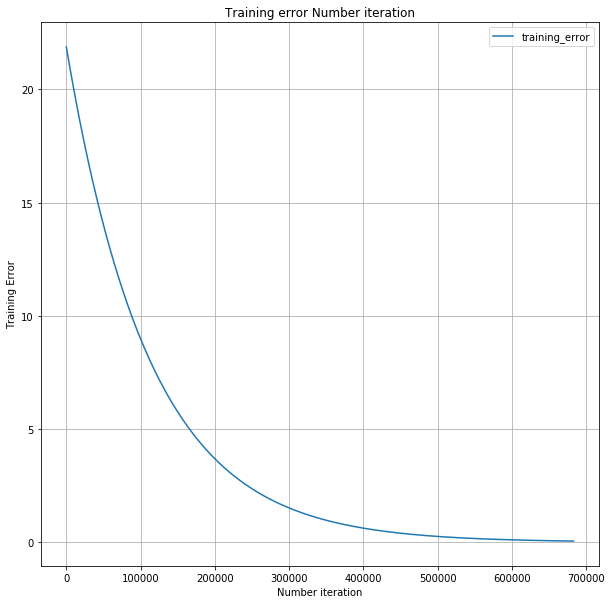

In [34]:
plt.figure(figsize=(10,10))
plt.plot(N,training_error, label="training_error")
plt.grid()

plt.title("Training error Number iteration")
plt.xlabel('Number iteration')
plt.ylabel('Training Error')
plt.legend()
#plt.savefig('trainingError.png')

plt.show()